# 1. 데이터 설명

[**IMDB Data** from 2006 to 2016](https://www.kaggle.com/PromptCloudHQ/imdb-data)

```
Here's a data set of 1,000 most popular movies on IMDB in the last 10 years. The data points included are:

Title, Genre, Description, Director, Actors, Year, Runtime, Rating, Votes, Revenue, Metascrore

Feel free to tinker with it and derive interesting insights.
```
* Rank : Movie rank order
* Title : The title of the film
* Genre : A comma-separated list of genres used to classify the film
* Description : Brief one-sentence movie summary
* Director : The name of the film's director
* Actors : A comma-separated list of the main stars of the film
* Year : The year that the film released as an integer
* Runtime..Minutes : The duration of the film in minutes
* Rating : User rating for the movie 0-10
* Votes : Number of votes
* Revenue..Millions : Movie revenue in millions
* Metascore : An aggregated average of critic scores. Values are between 0 and 100. Higher scores represent positive reviews.



In [1]:
IMDB = read.csv("./IMDB-Movie-Data.csv")

# 2. 결측치 처리

## 결측치란?

결측치(Missing Value)는 말 그대로 데이터에 값이 없는 것을 뜻한다. 줄여서 ’NA’라고 표현하기도 하고, 다른 언어에서는 Null 이란 표현을 많이 쓴다. 결측치는 데이터를 분석하는데에 있어서 매우 방해가 되는 존재이다. 

결측치를 다 제거해버리는 경우, 결측치의 비율에 따라서 막대한 데이터 손실을 불러일으킬 수 있다. 그리고 결측치를 잘못 대체할 경우, 데이터에서 편향(bias)이 생길 수가 있다. 또한 결측치를 처리하는 데에 있어 분석가의 견해가 가장 많이 반영되기 때문에 대체가 잘못될 경우 분석결과가 매우 틀어질 수도 있다.

결측치를 자세히 처리하기 위해서는 시간이 많이 투자되어야 한다. 무엇보다, 데이터에 기반한 결측치 처리가 진행되어야 분석을 정확하게 진행할 수 있다.

## 결측치 처리시 주의할 점

데이터를 다룰 때, 기본적으로 raw 데이터는 절대 건드리는 것이 아니다. 보통의 경우, 데이터를 새로 복사를 해두고 진행을 하는 것이 나중을 위해 매우 좋은 습관이다. 때로는 나머지 정보를 잃지 않기 위하여 최대한 합리적으로 결측치를 대체해야 할 필요가 있다. 가장 기본적인 방법은 다음과 같다.

* 연속형 변수
  * 평균으로 대체
* 이산형 변수
  * 최빈값으로 대체

하지만 이렇게 무턱대고 결측치를 대체하는 경우에는 데이터가 심하게 쏠릴 수가 있다. 결측치를 대체할 때는 항상 다음의 사항들을 확인해야 된다.

* 결측치의 비율
  * 만약, 결측치의 비율이 상당한 경우, 일단 지우고 보는 방식은 크나큰 정보 손실을 불러올 수가 있습니다.
* 데이터의 분포
  * 데이터를 분석 할 때, 항상 데이터의 분포를 확인하고 진행을 해야됩니다. 데이터가 평균을 중심으로 균형있게 퍼져있는 ’정규분포’형태를 뛰고 있는 경우라면 모르겠지만, 현실의 대부분 데이터는 그렇게 이상적이지는 않기 때문입니다. 다음의 그래프를 보면서 확인해보겠습니다.
* 다른 변수와의 관계가 있는지
  * 다른 변수와의 관계를 파악하여, 결측치를 대체하는 방법입니다. 전문적인 용어로는 ’Mssing value Imputation’이라고 하는데, 해당 방법론은 이 책의 수준을 벗어나기때문에 다루지 않도록 하겠습니다.

## 결측치 처리하기

* 결측치 확인

In [2]:
# Metascore 변수 내에서 결측치 논리문 판단 (TRUE, FALSE)
is.na(IMDB$Metascore)[1:20]

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

In [3]:
# Metascore 변수 내에 결측치 갯수
sum(is.na(IMDB$Metascore)) 

[1] 64

In [4]:
# IMDB 내 모든 변수별 결측치 갯수
print(colSums(is.na(IMDB)))

              Rank              Title              Genre        Description 
                 0                  0                  0                  0 
          Director             Actors               Year  Runtime..Minutes. 
                 0                  0                  0                  0 
            Rating              Votes Revenue..Millions.          Metascore 
                 0                  0                128                 64 


* 결측치 제거

> 전부 제거하는 경우, 가장 극단적인 방법임 (결측치가 하나라도 있는 obs(행) 삭제)

In [5]:
IMDB2 = na.omit(IMDB)
print(colSums(is.na(IMDB2)))

              Rank              Title              Genre        Description 
                 0                  0                  0                  0 
          Director             Actors               Year  Runtime..Minutes. 
                 0                  0                  0                  0 
            Rating              Votes Revenue..Millions.          Metascore 
                 0                  0                  0                  0 


> 특정 변수에 결측치가 존재하는 행만 삭제하는 경우

In [6]:
# 12번째 열에 결측치가 있는 경우에만 삭제
IMDB3 = IMDB[complete.cases(IMDB[ ,12]),]
print(colSums(is.na(IMDB3)))

              Rank              Title              Genre        Description 
                 0                  0                  0                  0 
          Director             Actors               Year  Runtime..Minutes. 
                 0                  0                  0                  0 
            Rating              Votes Revenue..Millions.          Metascore 
                 0                  0                 98                  0 


> 결측치를 특정값으로 대체할 경우

In [7]:
# Rawdata를 새로운 변수에 복사 
IMDB$Metascore2 = IMDB$Metascore 

# 결측치 대체
IMDB$Metascore2[is.na(IMDB$Metascore2)]=58.99

> 결측치 생략하고 계산할 경우

In [8]:
mean(IMDB$Revenue..Millions.) # NA 생성

[1] NA

In [9]:
mean(IMDB$Revenue..Millions., na.rm = TRUE)  # NA 생략하고 계산

[1] 82.95638

## 결측치 처리를 위한 데이터의 분포 탐색

아래 plot 및 summary 를 통해 평균으로 대체하는 것보다 중위수로 대체하는 것이 더 안전함을 알 수 있다.

In [10]:
library(ggplot2)

Warning message:
“Removed 128 rows containing non-finite values (stat_bin).”


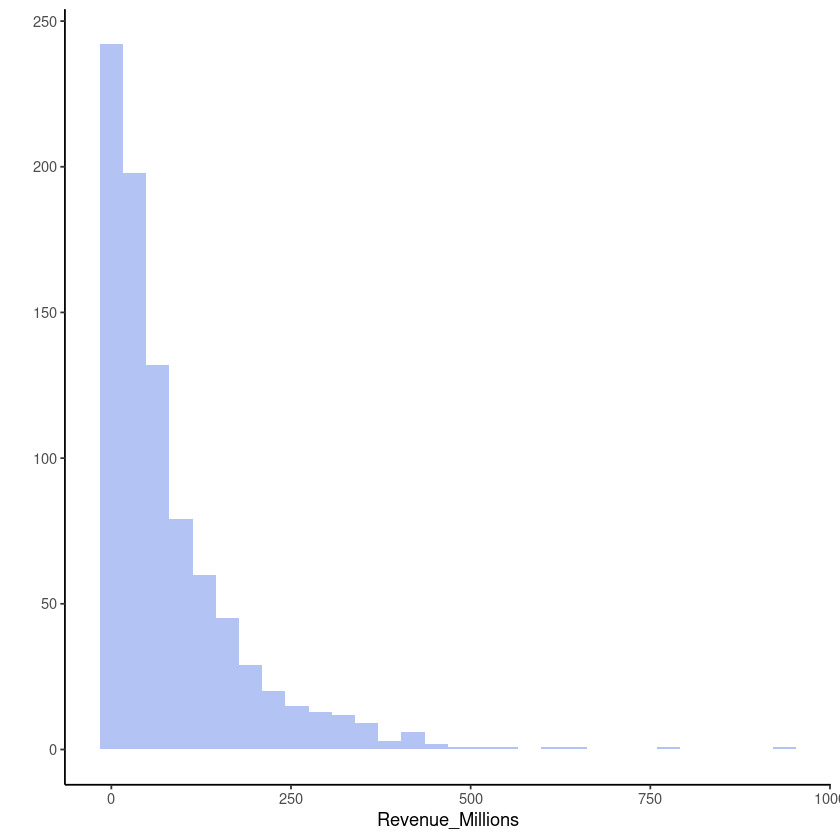

In [11]:
ggplot(IMDB,aes(x=Revenue..Millions.)) +
geom_histogram(fill='royalblue', alpha = 0.4, bins = 30) +
ylab('') +
xlab("Revenue_Millions") +
theme_classic()

Warning message:
“Removed 128 rows containing non-finite values (stat_boxplot).”


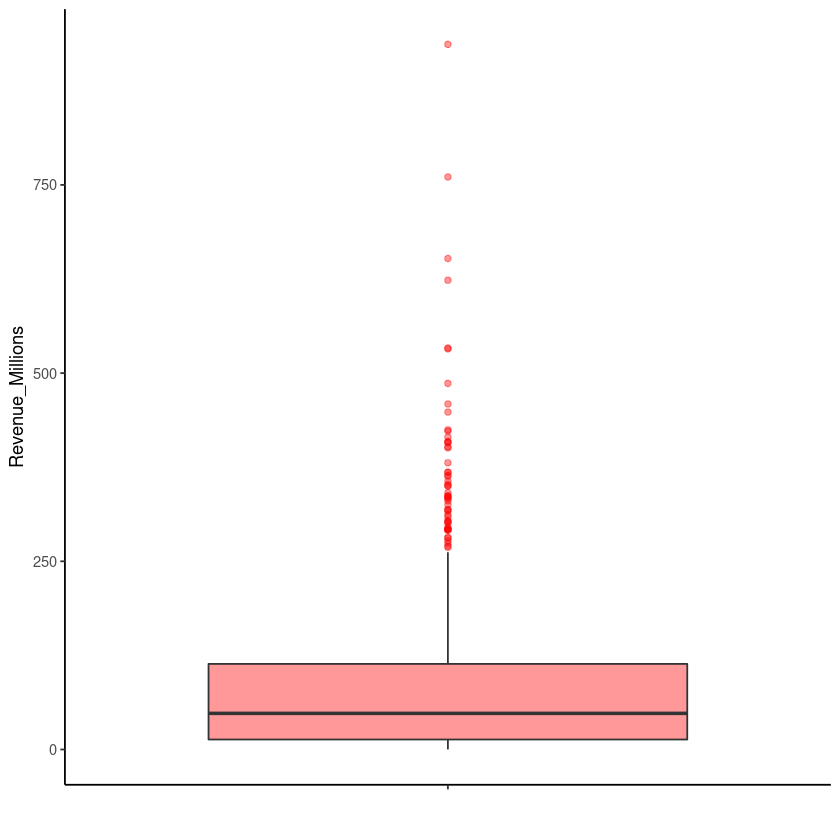

In [12]:
ggplot(IMDB,aes(x = "",y=Revenue..Millions.)) +
geom_boxplot(fill='red', alpha = 0.4,outlier.color = 'red') +
xlab('') +
ylab("Revenue_Millions") +
theme_classic()

In [13]:
summary(IMDB$Revenue..Millions.)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00   13.27   47.98   82.96  113.72  936.63     128 

# 3. 이상치 (outlier) 뽑아내기

Warning message:
“Removed 128 rows containing non-finite values (stat_boxplot).”


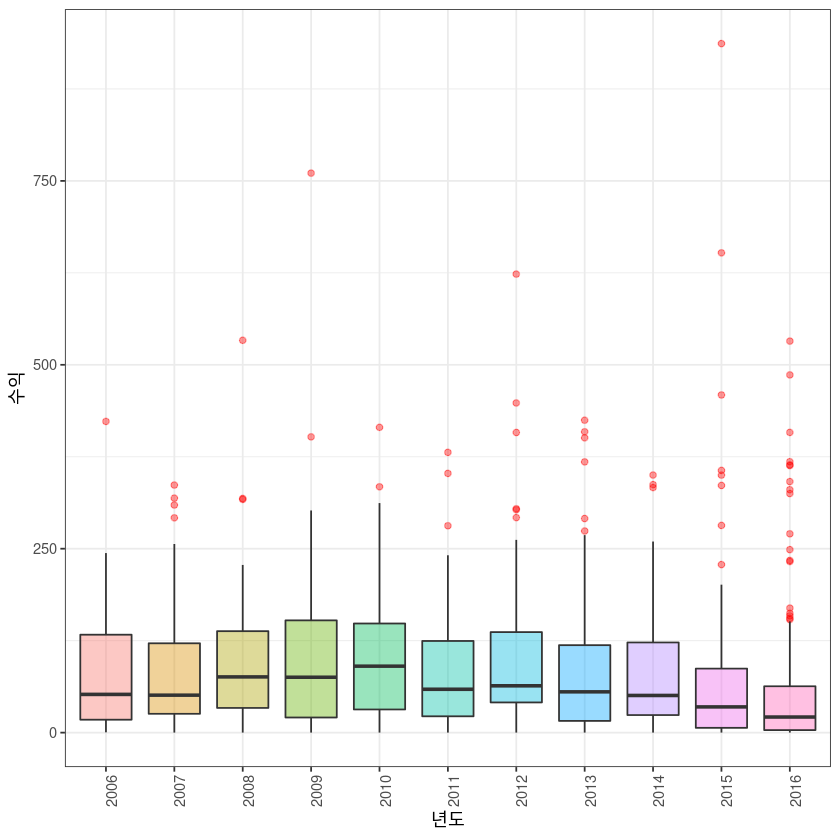

In [14]:
ggplot(IMDB,aes(x=as.factor(Year),y=Revenue..Millions.))+
  geom_boxplot(aes(fill=as.factor(Year)),outlier.colour = 'red',alpha=I(0.4))+
  xlab("년도") + ylab("수익") + guides(fill = "none") +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 90))

In [15]:
# Outlier인 데이터 제거하기

# 1분위수 계산
Q1 = quantile(IMDB$Revenue..Millions.,probs = c(0.25),na.rm = TRUE) 
# 3분위수 계산
Q3 = quantile(IMDB$Revenue..Millions.,probs = c(0.75),na.rm = TRUE)

LC = Q1 - 1.5 * (Q3 - Q1) # 아래 울타리
UC = Q3 + 1.5 * (Q3 - Q1) # 위 울타리

IMDB2 = subset(IMDB,
     Revenue..Millions. >  LC & Revenue..Millions. < UC)

# 4. 문자열 데이터 다루기

* 문자열 추출

> substr(문자열, 시작, 끝)

In [16]:
as.character(IMDB$Actors[1])

[1] "Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana"

In [17]:
substr(IMDB$Actors[1],1,5)

[1] "Chris"

* 문자열 붙이기

> paste(..., sep = " ")

In [18]:
paste(IMDB$Actors[1],"_",'A')

[1] "Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana _ A"

In [19]:
paste(IMDB$Actors[1],"_",'A',sep="") # 띄어쓰기 없이 붙이기

[1] "Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana_A"

In [20]:
paste(IMDB$Actors[1],"_","Example", sep="|") # |로 붙이기

[1] "Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana|_|Example"

* 문자열 분리

> strsplit(문자열, split = 나눌 문자)

In [21]:
print(strsplit(as.character(IMDB$Actors[1]), split= ","))

[[1]]
[1] "Chris Pratt"     " Vin Diesel"     " Bradley Cooper" " Zoe Saldana"   



* 문자열 대체

> gsub(패턴, 대체, 문자열)

In [22]:
IMDB$Genre2=gsub(","," ",IMDB$Genre)  # , 를 띄어쓰기로 대체

# 5. 텍스트 마이닝

In [23]:
library(NLP)
library(tm) # tm 패키지 설치 필요

CORPUS = Corpus(VectorSource(IMDB$Genre2)) # 코퍼스 생성
CORPUS_TM = tm_map(CORPUS,removePunctuation) # 특수문자 제거
CORPUS_TM = tm_map(CORPUS_TM, removeNumbers) # 숫자 제거 
CORPUS_TM = tm_map(CORPUS_TM, tolower) # 알파벳 모두 소문자로 바꾸기


Attaching package: ‘NLP’


The following object is masked from ‘package:ggplot2’:

    annotate


Warning message in tm_map.SimpleCorpus(CORPUS, removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(CORPUS_TM, removeNumbers):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(CORPUS_TM, tolower):
“transformation drops documents”


In [24]:
TDM=DocumentTermMatrix(CORPUS_TM) # 문서행렬 생성
inspect(TDM)

<<DocumentTermMatrix (documents: 1000, terms: 20)>>
Non-/sparse entries: 2555/17445
Sparsity           : 87%
Maximal term length: 9
Weighting          : term frequency (tf)
Sample             :
    Terms
Docs action adventure comedy crime drama horror mystery romance scifi thriller
  1       1         1      0     0     0      0       0       0     1        0
  10      0         1      0     0     1      0       0       1     0        0
  11      0         1      0     0     0      0       0       0     0        0
  12      0         0      0     0     1      0       0       0     0        0
  2       0         1      0     0     0      0       1       0     1        0
  4       0         0      1     0     0      0       0       0     0        0
  5       1         1      0     0     0      0       0       0     0        0
  6       1         1      0     0     0      0       0       0     0        0
  7       0         0      1     0     1      0       0       0     0        0
  9   

In [25]:
TDM = as.data.frame(as.matrix(TDM)) # 문서행렬을 데이터프레임 형태로 만들어주기.
head(TDM) 

,action,adventure,scifi,mystery,horror,thriller,animation,comedy,family,fantasy,drama,music,biography,romance,history,crime,western,war,musical,sport
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [26]:
IMDB_GENRE = cbind(IMDB,TDM)

In [27]:
CORPUS=Corpus(VectorSource(IMDB$Description))
CORPUS_TM = tm_map(CORPUS,stripWhitespace)
CORPUS_TM = tm_map(CORPUS_TM,removePunctuation)
CORPUS_TM = tm_map(CORPUS_TM, removeNumbers)
CORPUS_TM = tm_map(CORPUS_TM, tolower)

DTM = DocumentTermMatrix(CORPUS_TM)
inspect(DTM)

Warning message in tm_map.SimpleCorpus(CORPUS, stripWhitespace):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(CORPUS_TM, removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(CORPUS_TM, removeNumbers):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(CORPUS_TM, tolower):
“transformation drops documents”


<<DocumentTermMatrix (documents: 1000, terms: 5959)>>
Non-/sparse entries: 20445/5938555
Sparsity           : 100%
Maximal term length: 23
Weighting          : term frequency (tf)
Sample             :
     Terms
Docs  and for from her his that the their who with
  155   2   1    1   0   0    0   4     0   0    2
  232   1   0    0   0   1    0   2     0   1    2
  323   1   2    0   0   0    0   3     0   0    0
  324   1   0    0   0   0    1   5     0   0    1
  704   0   0    1   1   0    0   2     0   1    1
  764   4   0    1   0   0    0   1     2   0    0
  774   0   0    3   2   2    2   3     0   1    1
  836   2   0    0   0   0    0   5     1   0    0
  863   2   0    1   0   3    0   0     1   1    1
  960   2   0    0   0   1    0   5     0   0    0


In [28]:
CORPUS_TM = tm_map(CORPUS_TM,removeWords, 
         c(stopwords("english"),"my","custom","words"))

Warning message in tm_map.SimpleCorpus(CORPUS_TM, removeWords, c(stopwords("english"), :
“transformation drops documents”


In [29]:
convert_count = function(x) {
y <- ifelse(x > 0,1,0)
y = as.numeric(y)
y
}

In [30]:
convert_count = function(x) {
y <- ifelse(x > 0,x,0)
y = as.numeric(y)
y
}

In [31]:
DESCRIPT_IMDB=apply(DTM,MARGIN=2,convert_count)
DESCRIPT_IMDB=as.data.frame(DESCRIPT_IMDB)

In [32]:
# Temr Document Matrix 생성

TDM = TermDocumentMatrix(CORPUS_TM)

# 워드클라우드 생성
m =  as.matrix(TDM) 
v = sort(rowSums(m),decreasing=TRUE) # 빈도수를 기준으로 내림차순 정렬
d = data.frame(word = names(v),freq=v) 

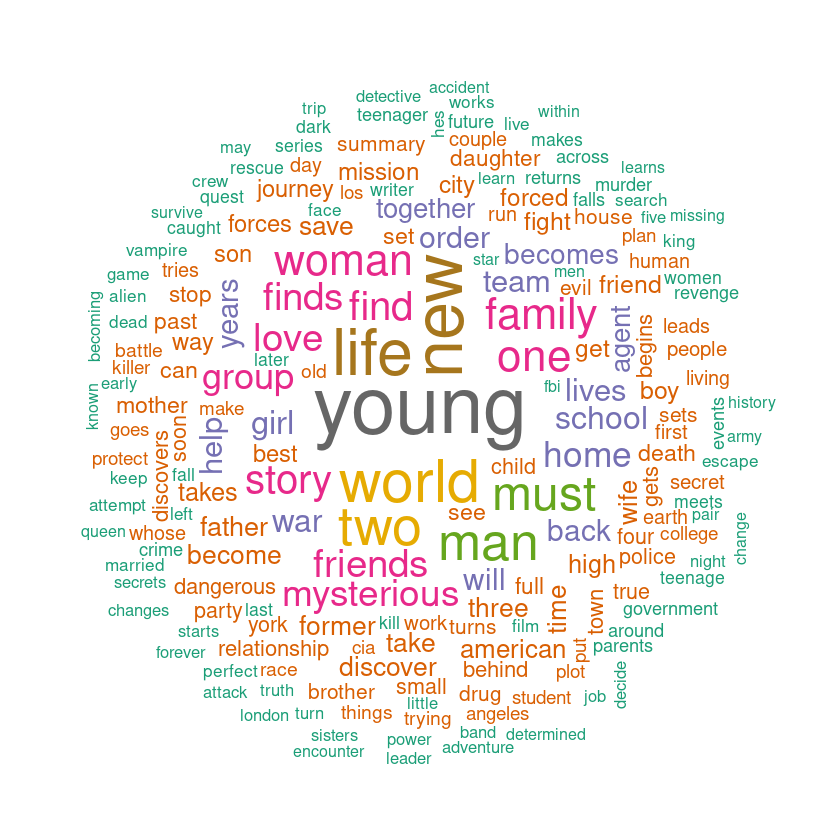

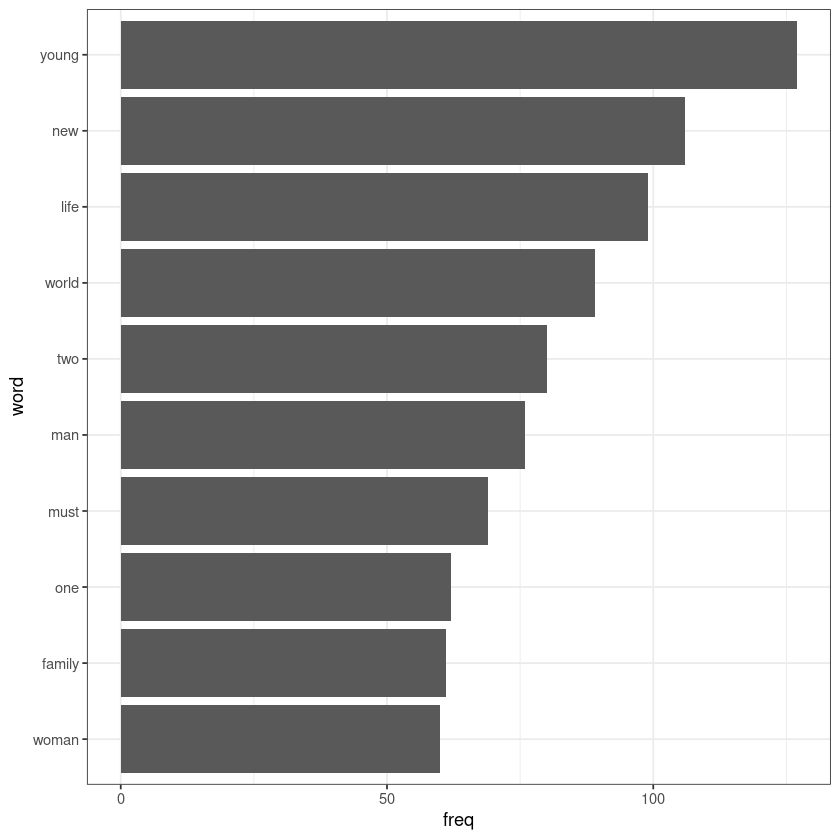

In [33]:
library(RColorBrewer)
library(SnowballC)
library(wordcloud)

# min.freq -> 최소 5번 이상 쓰인 단어만 띄우기
# max.words -> 최대 200개만 띄우기
# random.order -> 단어 위치 랜덤 여부

wordcloud(words = d$word, freq = d$freq, min.freq = 5,  
max.words=200, random.order=FALSE,
colors=brewer.pal(8, "Dark2"))

# 단어 빈도 그래프 그리기
ggplot(d[1:10,]) +
  geom_bar(aes(x = reorder(word,freq), y = freq), stat = 'identity') +
  coord_flip()+ xlab("word") + ylab("freq") +
  theme_bw()

# Review

In [ ]:
# IMDB 데이터 셋의 Revenue Millions 변수에 존재하는 결측치를 모두 0으로 전환시켜 
# Revenue_NonNA라는 변수를 만드시오.

In [ ]:
# Revenue Millions의 이상치범위를 계산하시오.